# Mugloest - 6 ADCP Experiment (March, 2013) 
&nbsp;<br>
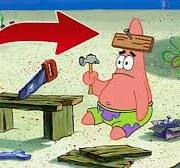
## I'm a idiot! To remind to take notes during the survey!
## Here the main task is to put the data from both campaigns in the same order!
&nbsp;<br>
&nbsp;<br>

# Part 1 - load the data, separate 'in water', put in the same order
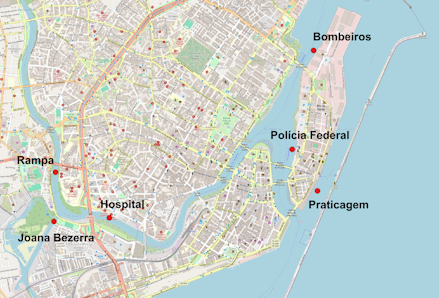

2018 05 16  (annotation!)

Eu passei esses dados reduzidos para o Arnoldo tirar alguma coisa fisicamente elegante e publicar num jornal bacana...  

Ele, ao analisar os dados, verificou que a variação de densidade estava estranha, usando as estações ao longo do eixo (Praticagem, PF, Hospital e Rampa).   
  
Eu fiz uma nova verificação, e usando o início de registro de dados de cada estação (tempo 1), e a ordem de instalação dos isntrumentos, os arquivos referentes às estações 2 (PF) e 4 (Hospital) estavam trocados.   

Os arquivos deste diretório já estão corrigidos.  

Pelas anotações de campo, a ordem de instalação foi:  

Campanha 1 - quadratura  
1 - Praticagem 		20.2361  
2 - PF			20.2500  
3 - Joana Bezerra	20.2708  
4 - Hospital		20.2917  
5 - Rampa		20.2986  
6 - Bombeiros		20.3125  

obs(31/05/2025): eu lembro que na 1.a campanha o fundeio dos bombeiro foi o último, porque tivemos que achar um lugar... e na segunda campanha 
por lógica, uma vez que já conhecíamos, foi o 3.o a ser instalado. Agora eu não consigo lembrar ou imaginar porque instalamos na Joana Bezerra em 3.o!?
Sim... mas a base era na rampa, e não dava para sair com todos os fundeios juntos... acho que levamos 3 de cada vez!
  
Campanha 2 - sizígia  
1 - Praticagem		26.2292  
2 - PF			26.2361  
3 - Bombeiros		26.2500  
4 - Hospital		26.2639  
5 - Rampa		26.2708  
6 - Joana Bezerra	26.2778  
  
A nomenclatura final segue a ordem de instalação da campanha 2  


2025.maio.31: Considerando esta ordem de instalação, dá para definir pelo tempo de início dos dados 'na água'  
2025.oct.30: De novo nós aqui... para juntar com os CTS... adicionando a temperatura para conferir com os CTS

In [16]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime
import pickle

import sys
sys.path.append(r'd:\guto\gpython\pytools')
import vector_tools as vt
import filtbin

In [17]:
stations_order_neap = ['Praticagem', 'PF', 'Joana Bezerra', 'Hospital', 'Rampa', 'Bombeiros']
stations_order_spring = ['Praticagem', 'PF', 'Bombeiros', 'Hospital', 'Rampa', 'Joana Bezerra']

# is está no arquivo "leiame_sobre os dados reduzidos.txt"
time_neap_notes = np.array([20.2361, 20.2500, 20.2708, 20.2917, 20.2986, 20.3125])
time_spring_notes = np.array([26.2292, 26.2361, 26.2500, 26.2639, 26.2708, 26.2778])

t_ref = datetime.datetime(2013, 3, 1)
t_ref_n = mdates.date2num(t_ref)

tnn = mdates.num2date(t_ref_n + time_neap_notes -1)
tsn = mdates.num2date(t_ref_n + time_spring_notes -1)

tnn = [x.strftime("%H:%M") for x in tnn]
tsn = [x.strftime("%H:%M") for x in tsn]

for i,t in zip(stations_order_neap, tnn):
    print(i, t)
print(' ')
for i,t in zip(stations_order_spring, tsn):
    print(i, t)

Praticagem 05:39
PF 06:00
Joana Bezerra 06:29
Hospital 07:00
Rampa 07:09
Bombeiros 07:30
 
Praticagem 05:30
PF 05:39
Bombeiros 06:00
Hospital 06:20
Rampa 06:29
Joana Bezerra 06:40


In [18]:
path_spring = r'd:\GUTO\1_Trabs\1_Aestus\Capibaribe\MuGloEst\201303_Campanha_6adcps\C20130326_spring\ADCPs\\'
path_neap = r'd:\GUTO\1_Trabs\1_Aestus\Capibaribe\MuGloEst\201303_Campanha_6adcps\C20130319_neap\ADCPs\\'

dir_spring = os.listdir(path_spring)
dir_neap = os.listdir(path_neap)

In [19]:
def cell_distance(lines):
    setup = ['Number of measurements', 'Profile interval', 'Number of cells', 'Cell size', 'Average interval', 'Blanking', 'Wave measurements']
    
    bd_ok = 0
    for li in lines:

        if setup[2] in li:
            number_cells = int(li.split()[3])
        
        if setup[3] in li and 'Wave' not in li:
            cell_size = int(li.split()[2])
            
        if setup[5] in li:
            blank_distance = float(li.split()[2])
            bd_ok = 1
        
        if bd_ok == 1:
            cell_size_m = cell_size/100
            cell_1 = cell_size_m + blank_distance
            
            levels = [cell_1]
            next_cell = cell_1
            for i in range(number_cells-1):
                next_cell += cell_size_m
                levels.append(next_cell)
            
            
            break
    levels = np.array(levels)

    
    return levels

In [20]:
ncells = 20
cell_size = .35
blank = .4

c1 = blank + cell_size
x = np.arange(c1, cell_size*ncells + c1, cell_size)
x.shape

(20,)

# Get the ADCP setup (number of cells, cell size, blank distance), and return the levels (distance form transducer)

post morten...  
I forget the about the levels when I pickled the new processes date (in order)...  
I need to change the order twice... Achtung!!

In [21]:
fnames_spring = []
fnames_neap = []

levels_spring = []
levels_neap = []

for f in dir_spring:
    if f.endswith('hdr') == True:
        with open(path_spring+f) as io:
            lines = io.readlines()
        c = cell_distance(lines)
        levels_spring.append(c)
        
        fnames_spring.append(f[:-3])
        
for f in dir_neap:
    if f.endswith('hdr') == True:
        with open(path_neap+f) as io:
            lines = io.readlines()
        c = cell_distance(lines)
        levels_neap.append(c)
        
        fnames_neap.append(f[:-3])

In [22]:
for i, f in enumerate(fnames_neap):
    print(i, f)
print('')
for i, f in enumerate(fnames_spring):
    print(i, f)

0 Muglo01_N1_MG.
1 Muglo01_N2_ME.
2 Muglo01_N3_ME.
3 Muglo01_N4_MG.
4 Muglo01_N5_MG.
5 Muglo01_N6_MG.

0 MuGlo2_N1_G1000.
1 MuGlo2_N2_E2000.
2 MuGlo2_N3_E1000.
3 MuGlo2_N4_G1000.
4 MuGlo2_N5_G1000.
5 MuGlo2_N6_G2000.


In [23]:
# Analisando e reanalisando...

estacoes = ['PF', 'Bombeiros', 'Rampa', 'Hospital', 'Praticagem', 'Joana Bezerra']

In [24]:
extensions = ['sen', 'v1', 'v2', 'v3', 'a1', 'a2', 'a3']
def upload_data(root, name):

    for ext in extensions:

        arq = np.loadtxt(root + name + ext)

        # this trick names the upload date based on the list of 'extensions'
        globals()[ext] = arq
        
    amp = (a1 + a2 + a3)/3  
        
    time = []
    for li in sen:
        dh = [int(x) for x in li[:6]]
        ctime = datetime.datetime(dh[2], dh[0], dh[1], dh[3], dh[4], dh[5])
        time.append(ctime)

    time = np.array(time)
    pressure = sen[:,13]
    temperature = sen[:,14]
                    
    return time, pressure, v1, v2, amp, temperature

Trying to put the data in order... the order of files is different between campaigns.   
Here a curious behavior...  doing with the order of files, I get the first time 'in water', but  
when I user the stations orders specified by a list, the times changes a little bit! Hummmm...  

Solution: after a while I noticed that there was some manual data removal...!

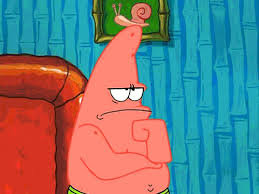  
## Putting the data in order... !!!!!! Fuck...

# Load Neap

Muglo01_N5_MG.      05:40     14:10     (196, 60)
Muglo01_N4_MG.      06:00     14:00     (193, 60)
Muglo01_N6_MG.      06:30     13:00     (184, 60)
Muglo01_N1_MG.      07:00     13:10     (182, 60)
Muglo01_N3_ME.      07:10     13:20     (182, 60)
Muglo01_N2_ME.      07:30     13:50     (183, 60)


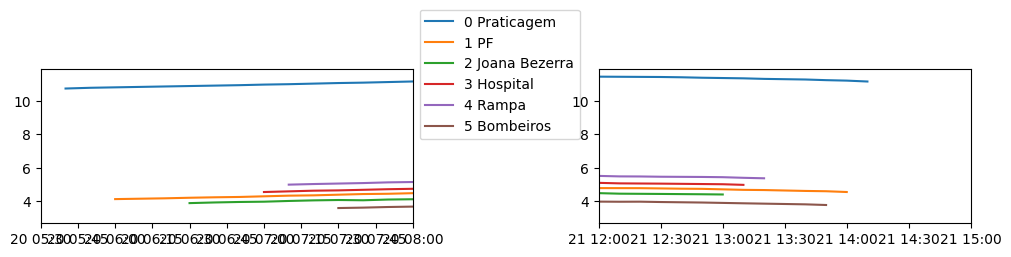

In [25]:
files_order_neap = [4, 3, 5, 0, 2, 1]  # can´t remember where this come from! !! pela ordem das cores, mudando manualmente

levels_neap_2 = [levels_neap[i] for i in files_order_neap]

v1_neap = []
v2_neap = []
amp_neap = []
time_neap = []
pressure_neap = []
temperature_neap = []
for ii, f in enumerate(files_order_neap):
    time, pressure, v1, v2, amp, temperature = upload_data(path_neap, fnames_neap[f])
    
    # find 'in water'
    i = np.array(np.where(pressure > 1.5)).squeeze()
    # and some extra cut
    if ii in [4, 5]:   
        i = i[1:]
    if ii in [0]:
        i = i[:-1]
    time = time[i]
    pressure = pressure[i]
    temperature = temperature[i]
    v1 = v1[i,:]
    v2 = v2[i,:]
    amp = amp[i,:]
    print(fnames_neap[f], '    ', time[0].strftime("%H:%M"),'   ', time[-1].strftime("%H:%M"),'   ', amp.shape)
    
    time_neap.append(time)
    pressure_neap.append(pressure)
    temperature_neap.append(temperature)
    v1_neap.append(v1)
    v2_neap.append(v2)
    amp_neap.append(amp)

fig, axs = plt.subplots(1,2, figsize=(12,2))
for i in range(6):
    axs[0].plot(time_neap[i], pressure_neap[i], label=str(i) + ' ' + stations_order_neap[i])
    axs[1].plot(time_neap[i], pressure_neap[i])
axs[0].legend(bbox_to_anchor=(1, .5))
axs[0].set_xlim(datetime.datetime(2013, 3, 20, 5, 30), datetime.datetime(2013, 3, 20, 8))
axs[1].set_xlim(datetime.datetime(2013, 3, 21, 12), datetime.datetime(2013, 3, 21, 15))
fig.subplots_adjust(wspace=.5)

### Puting the data in order... first the 'longitudinal' stations (pratic, PF, hospital, rampa), than Bombeiros and J.Bezerra

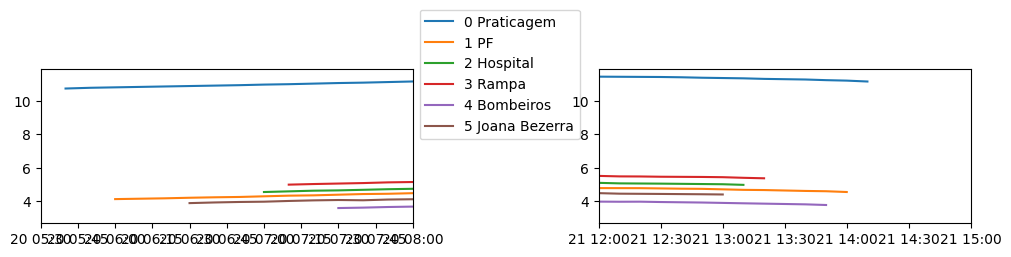

In [26]:
stations_new_order = ['Praticagem', 'PF', 'Hospital', 'Rampa', 'Bombeiros','Joana Bezerra']
neap_new_order = [0, 1, 3, 4, 5, 2]

levels_neap_3 = [levels_neap_2[i] for i in neap_new_order]

v1_neap_b = []
v2_neap_b = []
amp_neap_b = []
time_neap_b = []
pressure_neap_b= []
temperature_neap_b = []
for i in neap_new_order:
    v1_neap_b.append(v1_neap[i])
    v2_neap_b.append(v2_neap[i])
    amp_neap_b.append(amp_neap[i])
    time_neap_b.append(time_neap[i])
    pressure_neap_b.append(pressure_neap[i])
    temperature_neap_b.append(temperature_neap[i])

fig, axs = plt.subplots(1,2, figsize=(12,2))
for i in range(6):
    axs[0].plot(time_neap_b[i], pressure_neap_b[i], label=str(i) + ' ' + stations_new_order[i])
    axs[1].plot(time_neap_b[i], pressure_neap_b[i])
axs[0].legend(bbox_to_anchor=(1, .5))
axs[0].set_xlim(datetime.datetime(2013, 3, 20, 5, 30), datetime.datetime(2013, 3, 20, 8))
axs[1].set_xlim(datetime.datetime(2013, 3, 21, 12), datetime.datetime(2013, 3, 21, 15))
fig.subplots_adjust(wspace=.5)

# Load Spring

MuGlo2_N5_G1000.      05:30     14:00     (196, 60)
MuGlo2_N1_G1000.      05:40     14:10     (196, 60)
MuGlo2_N2_E2000.      06:00     14:20     (195, 60)
MuGlo2_N4_G1000.      06:20     15:00     (197, 60)
MuGlo2_N3_E1000.      06:30     18:00     (214, 60)
MuGlo2_N6_G2000.      06:40     15:50     (200, 60)


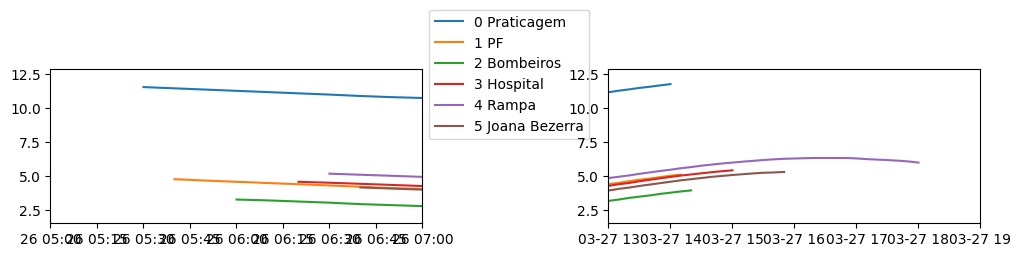

In [27]:
files_order_spring = [4, 0, 1, 3, 2, 5]

levels_spring_2 = [levels_spring[i] for i in files_order_spring]

v1_spring = []
v2_spring = []
amp_spring = []
time_spring = []
pressure_spring = []
temperature_spring = []

for ii, f in enumerate(files_order_spring):
    time, pressure, v1, v2, amp, temperature = upload_data(path_spring, fnames_spring[f])
    
    # find 'in water'
    i = np.array(np.where(pressure > 1.5)).squeeze()
    
    if ii in [0, 1]:  # to eliminate some extra bad data at beginning or end 
        i = i[1:-1]
    
    time = time[i]
    pressure = pressure[i]
    temperature = temperature[i]
    v1 = v1[i,:]
    v2 = v2[i,:]
    amp = amp[i,:]
    print(fnames_spring[f], '    ', time[0].strftime("%H:%M"),'   ',time[-1].strftime("%H:%M"),'   ', amp.shape)
    
    time_spring.append(time)
    pressure_spring.append(pressure)
    temperature_spring.append(temperature)
    v1_spring.append(v1)
    v2_spring.append(v2)
    amp_spring.append(amp)

fig, axs = plt.subplots(1,2, figsize=(12,2))
for i in range(6):
    axs[0].plot(time_spring[i], pressure_spring[i], label=str(i) + ' ' + stations_order_spring[i])
    axs[1].plot(time_spring[i], pressure_spring[i])
axs[0].legend(bbox_to_anchor=(1, .5))
axs[0].set_xlim(datetime.datetime(2013, 3, 26, 5), datetime.datetime(2013, 3, 26, 7))
axs[1].set_xlim(datetime.datetime(2013, 3, 27, 13), datetime.datetime(2013, 3, 27, 19))
fig.subplots_adjust(wspace=.5)

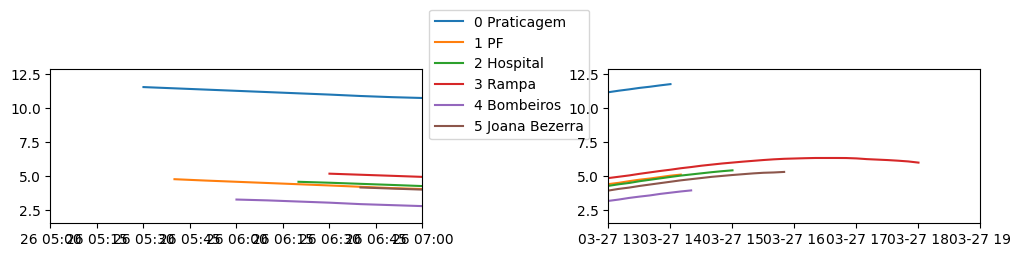

In [28]:
stations_new_order = ['Praticagem', 'PF', 'Hospital', 'Rampa', 'Bombeiros','Joana Bezerra']
spring_new_order = [0, 1, 3, 4, 2, 5]

levels_spring_3 = [levels_spring_2[i] for i in spring_new_order]

v1_spring_b = []
v2_spring_b = []
amp_spring_b = []
time_spring_b = []
pressure_spring_b = []
temperature_spring_b = []
for i in spring_new_order:
    v1_spring_b.append(v1_spring[i])
    v2_spring_b.append(v2_spring[i])
    amp_spring_b.append(amp_spring[i])
    time_spring_b.append(time_spring[i])
    pressure_spring_b.append(pressure_spring[i])
    temperature_spring_b.append(temperature_spring[i])

fig, axs = plt.subplots(1,2, figsize=(12,2))
for i in range(6):
    axs[0].plot(time_spring_b[i], pressure_spring_b[i], label=str(i) + ' ' + stations_new_order[i])
    axs[1].plot(time_spring_b[i], pressure_spring_b[i])
axs[0].legend(bbox_to_anchor=(1, .5))
axs[0].set_xlim(datetime.datetime(2013, 3, 26, 5), datetime.datetime(2013, 3, 26, 7))
axs[1].set_xlim(datetime.datetime(2013, 3, 27, 13), datetime.datetime(2013, 3, 27, 19))
fig.subplots_adjust(wspace=.5)

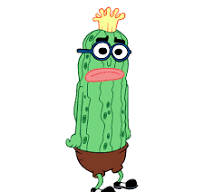

In [29]:
junta_neap = [time_neap_b, pressure_neap_b, levels_neap_3, v1_neap_b, v2_neap_b, amp_neap_b, temperature_neap_b]
junta_spring = [time_spring_b, pressure_spring_b, levels_spring_3, v1_spring_b, v2_spring_b, amp_spring_b, temperature_spring_b]
j = [junta_neap, junta_spring]
with open('ADCP_in_order.pkl', 'wb') as io:
    pickle.dump(j, io)